<a href="https://colab.research.google.com/github/WahyuKhairi06/BigData_2311531009_Wahyu-Khairi/blob/main/Praktikum%208/Praktikum_8_Big_Data_2311531009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
df=pd.read_csv('/content/heart_processed_new.csv')
df.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_2,thal_3,exang_1,fbs_1
0,0.937219,0.756938,-0.272801,0.019152,1.065587,0,1,True,False,False,True,False,False,False,False,False,False,False,True
1,-1.937566,-0.090680,0.054821,1.632621,2.096070,0,1,True,False,True,False,True,False,False,False,True,False,False,False
2,-1.495292,-0.090680,-0.831685,0.978512,0.292725,0,1,False,True,False,False,False,False,False,True,True,False,False,False
3,0.163238,-0.655759,-0.214985,1.240155,-0.222517,0,1,True,True,False,False,True,False,False,True,True,False,False,False
4,0.273807,-0.655759,2.059094,0.586046,-0.394264,0,1,False,False,False,False,True,False,False,True,True,False,True,False


In [70]:
X = df.drop('target', axis=1)
y = df['target']


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)
pred_default = rf_default.predict(X_test)

acc_def = accuracy_score(y_test, pred_default)
pred_def = precision_score(y_test, pred_default)
rec_def = recall_score(y_test, pred_default)
f1_def = f1_score(y_test, pred_default)

print("\n=== Random Forest Default ===")
print(f"Accuracy: {acc_def}")
print(f"Precision: {pred_def}")
print(f"Recall: {rec_def}")
print(f"F1 Score: {f1_def}")


=== Random Forest Default ===
Accuracy: 0.85
Precision: 0.896551724137931
Recall: 0.8125
F1 Score: 0.8524590163934426


In [73]:
rf = RandomForestClassifier(random_state=42)

In [74]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
}

In [75]:
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [76]:
best_model = grid_search.best_estimator_


In [77]:
print ("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [78]:
y_pred = best_model.predict(X_test)

acc_tuned = accuracy_score(y_test, y_pred)
prec_tuned = precision_score(y_test, y_pred)
rec_tuned = recall_score(y_test, y_pred)
f1_tuned = f1_score(y_test, y_pred)

print("\n=== Random Forest Tuned ===")
print(f"Accuracy: {acc_tuned}")
print(f"Precision: {prec_tuned}")
print(f"Recall: {rec_tuned}")
print(f"F1 Score: {f1_tuned}")


=== Random Forest Tuned ===
Accuracy: 0.85
Precision: 0.896551724137931
Recall: 0.8125
F1 Score: 0.8524590163934426


In [79]:
importances = best_model.feature_importances_
feature_names = X.columns

fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

In [80]:
fi_df

,Feature,Importance
5,ca,0.148690
3,thalach,0.115058
4,oldpeak,0.102831
14,thal_2,0.099665
0,age,0.088398
2,chol,0.073589
15,thal_3,0.071867
1,trestbps,0.071856
6,sex_1,0.043426
8,cp_2,0.037297


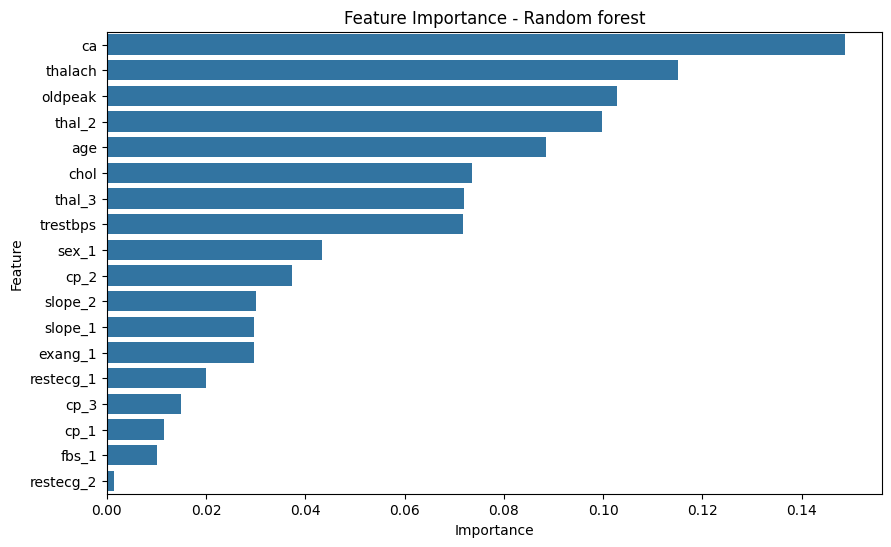

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title('Feature Importance - Random forest')
plt.show()

In [82]:
top5_features = fi_df['Feature'].head(5).tolist()
print("\n5 feature : ",top5_features)


5 feature :  ['ca', 'thalach', 'oldpeak', 'thal_2', 'age']


In [83]:
X_train_top5 = X_train[top5_features]
X_test_top5 = X_test[top5_features]

rf_top5 = RandomForestClassifier(random_state=42)
rf_top5.fit(X_train_top5, y_train)
y_pred_top5 = rf_top5.predict(X_test_top5)

acc_top5 = accuracy_score(y_test, y_pred_top5)
prec_5 = precision_score(y_test, y_pred_top5)
rec_5 = recall_score(y_test, y_pred_top5)
f1_5 = f1_score(y_test, y_pred_top5)

print("\n=== Random Forest (top 5 features) ===")
print(f"Accuracy: {acc_top5}")
print(f"Precision: {prec_5}")
print(f"Recall: {rec_5}")
print(f"F1 Score: {f1_5}")


=== Random Forest (top 5 features) ===
Accuracy: 0.8666666666666667
Precision: 0.9
Recall: 0.84375
F1 Score: 0.8709677419354839


In [88]:
results = pd.DataFrame ({
    "model": ["RF default", "RF tuned (GridSearchCV)", "RF top5 Features"],
    "accuracy": [acc_def, acc_tuned, acc_top5],
    "precision": [pred_def, prec_tuned, prec_5],
    "recall": [rec_def, rec_tuned, rec_5],
    "f1_score": [f1_def, f1_tuned, f1_5]
})

print ("\n=== Perbandingan Model ===")
display (results)


=== Perbandingan Model ===


,model,accuracy,precision,recall,f1_score
0,RF default,0.850000,0.896552,0.81250,0.852459
1,RF tuned (GridSearchCV),0.850000,0.896552,0.81250,0.852459
2,RF top5 Features,0.866667,0.900000,0.84375,0.870968
